# KNN Classifier

In [221]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scikitplot as skplt
from mnist import MNIST
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

### Loading data

(60000, 784)
(10000, 784)


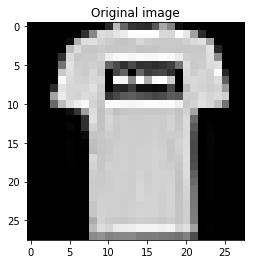

In [222]:
mndata = MNIST('C:\\University\\Machine learning\\Ass_2\\Sample Data')
images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

images= np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

print(images.shape)
print(test_images.shape)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray)
plt.title('Original image')
plt.show()

### Data preprocessing

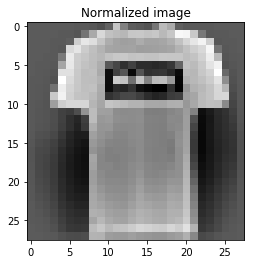

In [242]:
#Normalization
images = images.astype('float64')
# images -= np.mean(images, axis = 0)
images /= 255
test_images = test_images.astype('float64')
# test_images -= np.mean(images, axis = 0)
test_images /= 255

plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray)
plt.title('Normalized image')
plt.show()

In [230]:
# PCA
pca = PCA(n_components = 120)
red_images = pca.fit_transform(images)
red_test_images = pca.transform(test_images)
print(red_images.shape)
print(red_test_images.shape)


(60000, 120)
(10000, 120)


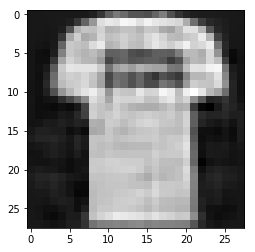

In [231]:
inv_pca_images = pca.inverse_transform(red_images)
plt.imshow(inv_pca_images[1].reshape(28,28), cmap=plt.cm.gray)
plt.show()

### Split data into train data and validation data

In [181]:
train_x, validate_x , train_y , validate_y = train_test_split(red_images , labels ,test_size=0.2, random_state=42)
print(train_x.shape, validate_x.shape)

(48000, 80) (12000, 80)


### KNN on train data and validation data

In [182]:
# Training accuracy, validating accuracy and time with respect to k from 1 to 10
k_Neighbors = np.arange(1, 11)
# n_Components = np.arange(40, 55, 5)
# train_accuracy = np.zeros((len(n_Components), len(k_Neighbors)))
# validate_accuracy = np.zeros((len(n_Components), len(k_Neighbors)))
# run_time = np.zeros((len(n_Components), len(k_Neighbors)))
train_accuracy = np.zeros((len(k_Neighbors)))
validate_accuracy = np.zeros((len(k_Neighbors)))
run_time = np.zeros((len(k_Neighbors)))

In [165]:
for j, k in enumerate(k_Neighbors):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_y)
    train_accuracy[j] = knn.score(train_x, train_y)
    validate_accuracy[j] = knn.score(validate_x, validate_y) 
    end_time=time.time()
    run_time[j] = end_time - start_time
    print(j, 'th iteration finished')

0 th iteration finished
1 th iteration finished
2 th iteration finished
3 th iteration finished
4 th iteration finished
5 th iteration finished
6 th iteration finished
7 th iteration finished
8 th iteration finished
9 th iteration finished


In [166]:
print(validate_accuracy)
print(run_time)

[0.85225    0.849      0.8565     0.862      0.86183333 0.863
 0.86133333 0.86225    0.85883333 0.86091667]
[ 30.25570774 144.55416989 162.93714499 165.68016887 175.7346859
 176.92990589 181.93027186 185.656528   194.85363364 196.9893198 ]


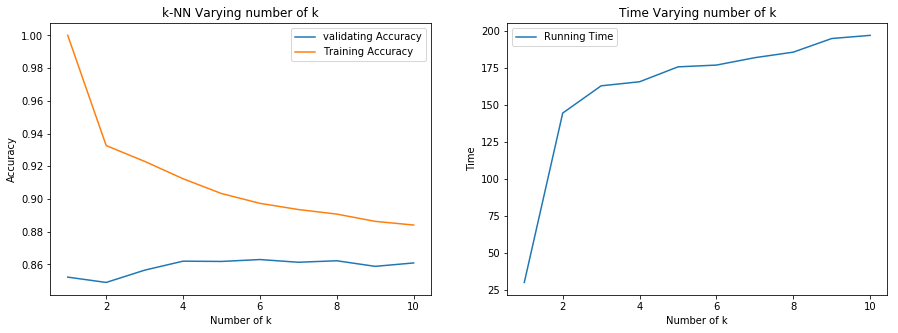

In [167]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('k-NN Varying number of k')
plt.plot(k_Neighbors, validate_accuracy, label='validating Accuracy')
plt.plot(k_Neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of k')
plt.ylabel('Accuracy')
plt.subplot(122)
plt.title('Time Varying number of k')
plt.plot(k_Neighbors, run_time, label='Running Time')
plt.legend()
plt.xlabel('Number of k')
plt.ylabel('Time')
plt.show()

In [169]:
# Choosing best k when varience of PCA is 95%
print(np.argmax(validate_accuracy)+1)
print('Highest Accuracy: ', np.round(np.max(validate_accuracy)*100, 2), '%')

6
Highest Accuracy:  86.3 %


### KNN on test data

In [232]:
# Choose k=6
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(red_images, labels)
print('Accuracy: ', np.round(knn.score(red_test_images, test_labels)*100, 2), '%')
pred_labels = knn.predict(red_test_images)
pred_proba = knn.predict_proba(red_test_images)
end_time = time.time()
print('Time: ', np.round(end_time-start_time, 2), 's')

Accuracy:  86.42 %
Time:  62.31 s


### Confusion Matrix

In [233]:
# confusion matrix
pd.crosstab(test_labels, pred_labels, rownames=['True Labels'], colnames=['Predict Labels'])

Predict Labels,0,1,2,3,4,5,6,7,8,9
True Labels,,,,,,,,,,
0,832,0,15,16,5,1,119,1,11,0
1,6,969,4,14,4,0,2,0,1,0
2,19,2,785,10,101,0,82,0,1,0
3,27,5,11,874,41,0,37,0,5,0
4,1,1,107,22,781,0,85,0,3,0
5,0,0,0,0,0,896,0,55,1,48
6,156,0,105,24,82,0,618,0,15,0
7,0,0,0,0,0,9,0,955,0,36
8,1,0,5,5,6,1,12,6,962,2


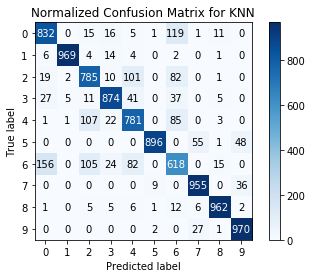

In [234]:
# confusion matrix
skplt.metrics.plot_confusion_matrix(test_labels, pred_labels, title='Confusion Matrix for KNN')
plt.show()

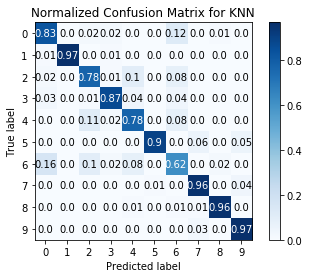

In [235]:
# normalized confusion matrix
skplt.metrics.plot_confusion_matrix(test_labels, pred_labels, title='Normalized Confusion Matrix for KNN', normalize=True)
plt.show()

### Metrics: Precision, Recall, F1-score, Support

In [236]:
print(classification_report(test_labels, pred_labels))

             precision    recall  f1-score   support

          0       0.80      0.83      0.81      1000
          1       0.99      0.97      0.98      1000
          2       0.76      0.79      0.77      1000
          3       0.91      0.87      0.89      1000
          4       0.77      0.78      0.77      1000
          5       0.99      0.90      0.94      1000
          6       0.65      0.62      0.63      1000
          7       0.91      0.95      0.93      1000
          8       0.96      0.96      0.96      1000
          9       0.92      0.97      0.94      1000

avg / total       0.87      0.86      0.86     10000



### ROC Curve

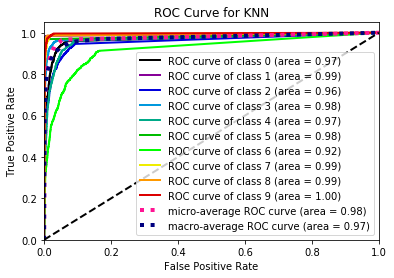

In [240]:
skplt.metrics.plot_roc(test_labels, pred_proba, title='ROC curve for KNN')
plt.show()

### Precision_Recall Curve

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


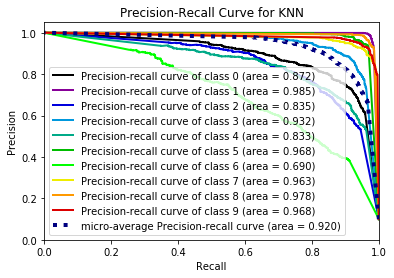

In [241]:
skplt.metrics.plot_precision_recall_curve(test_labels, pred_proba, title = 'Precision-Recall Curve for KNN')
plt.show()